# Exercise 4.1 -Study the dynamics of one of the following sets of rules for two arrays of 256 and 257 cells with periodic boundary conditions

In [1]:
from numpy import array

class Rule(object):
    __f = None
    
    def __init__(self, f=lambda x: x[1]):
        if not isinstance(f, dict) and not callable(f):
            raise(TypeError('Rule argument must be callable or dict instance'))
        
        self.__f = f
    
    def __call__(self, cell, *args, **kwargs):
        if callable(self.__f):
            return self.__f(cell, *args, **kwargs)
        else:
            return self.__f[cell]

In [2]:
from numpy import array
from numpy import where
from numpy import zeros
from numpy import ones
from collections import Iterable


class State(object):
    FINITE='f'
    PERIODIC='p'
    
    __grid = None
    __stype = None
    
    def __init__(self, s, stype=PERIODIC):
        if stype == self.PERIODIC or stype == self.FINITE:
            self.__stype = stype
        else:
            raise(ValueError('Invalid value for ntype.'))
            
        if isinstance(s, int):
            self.__grid = zeros(s)
            
        if isinstance(s, Iterable):
            self.__grid = array(list(s))
    
    def __getitem__(self, key):
        return self.__grid[key]

    def __setitem__(self, key, value):
        self.__grid[key] = value
        
    def __len__(self):
        return len(self.__grid)
        
    def __str__(self):
        return str(self.__grid)
    
    def __repr__(self):
        return repr(self.__grid)

    def __eq__(self, other):
        return self.grid.__eq__(other)
    
    @property
    def grid(self):
        return self.__grid
    
    @property
    def stype(self):
        return self.__stype
    
    @property
    def neighborhoods(self):        
        begin = [self.grid[-1] if self.__stype == self.PERIODIC else 0]
        end = [self.grid[0] if self.__stype == self.PERIODIC else 0]
        fake_grid = tuple(begin + list(self.grid) + end)
        
        return list(fake_grid[i-1:i+2] for i in range(1, len(self.grid) + 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  """


In [3]:
class CellularAutomaton(object):
    """
    Cellular Atomaton class
    """
    __seed = None
    __history = None
    __rule = None
    __stype = None
    
    def __init__(self, seed=None, rule=None):
        # Check for seed assignment
        if isinstance(seed, State):
            self.__stype = seed.stype
            self.__seed = array(seed.grid, dtype=int)
            self.__history = [array(self.__seed, dtype=int)]
            
        elif seed is None:
            self.__seed = None
            self.history = None
        else:
            raise(TypeError("Argument 'seed' must be a State instance"))
        
        # Check for rule assignment
        if isinstance(rule, Rule):
            self.__rule = rule
        elif rule is None:
            self.__rule = None
        else:
            raise(TypeError("Argument 'rule' must be a Rule instance"))
    

    def evolve(self, steps=1):
        if steps < 1:
            raise(ValueError("Evolution steps must be greater than 0"))
        
        if self.__rule is None:
            raise(ValueError("Evolution rule is not defined"))
        
        if self.__seed is None:
            raise(ValueError("Initial state doesn't exists"))
            
        for i in range(len(self.history), steps):
            
            self.__history.append(
                array(
                    [self.rule(neighborhood) for neighborhood in State(self.history[-1], self.stype).neighborhoods]
                )
            )
   
    # Properties
    @property
    def rule(self):
        return self.__rule
    
    @rule.setter
    def rule(self, value):
        if isinstance(value, Rule):
            self.__rule = rule
        else:
            raise TypeError("Argument 'rule' must be a Rule instance")
    
    @property
    def seed(self):
        return self._seed
    
    @seed.setter
    def seed(self, value):
        if isinstance(value, State):
            self.__stype = value.stype
            self.__seed = array(value.grid)
            self.__history = [array(self.__seed)]
        else:
            raise TypeError("Argument 'rule' must be a State instance")
    
    @property
    def stype(self):
        return self.__stype

    @property
    def history(self):
        return array(self.__history)

## 1.	A single black (1) cell in the middle of the array  

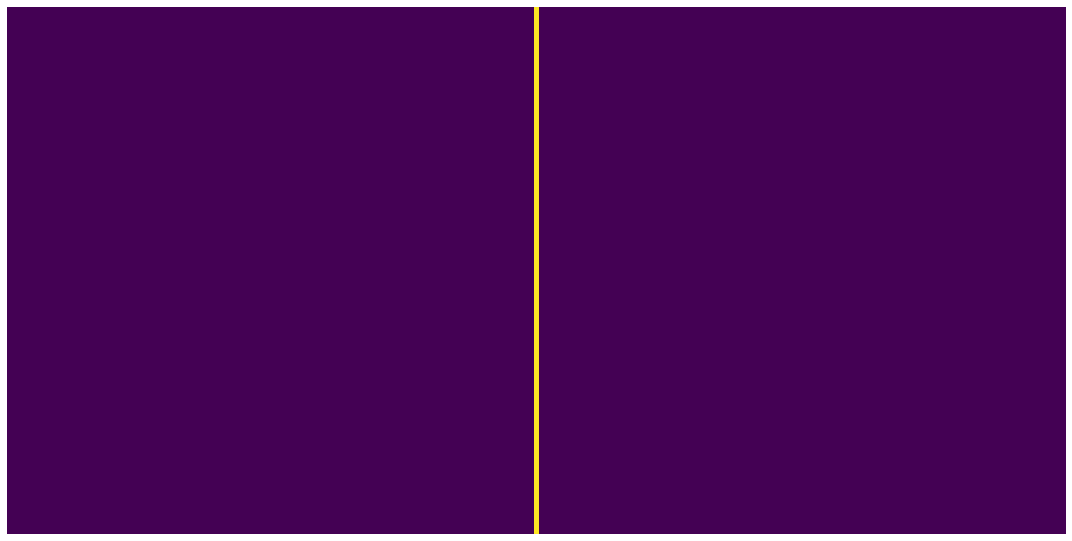

In [4]:
import matplotlib.pyplot as plt

Rule4 = Rule({ #100
    (0,0,0): 0, 
    (0,0,1): 0,
    (0,1,0): 1,
    (0,1,1): 0,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
})
size = 257
center = size//2

seed = State(size)
seed[size//2] = 1
ca = CellularAutomaton(seed, Rule4);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

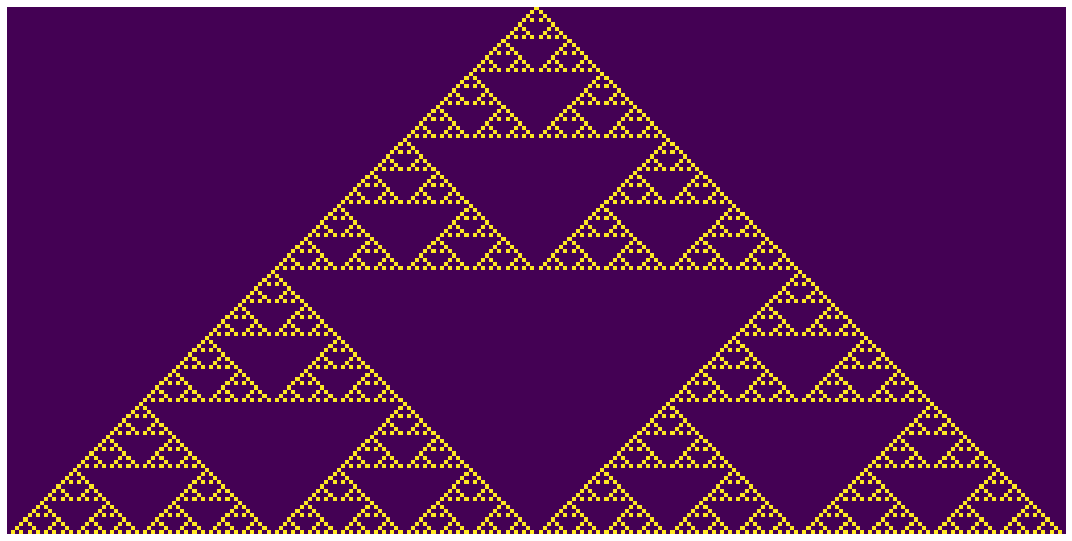

In [ ]:
import matplotlib.pyplot as plt

Rule90 = Rule({ #1011010
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 1,
    (1,1,1): 0,
})
size = 257
center = size//2

seed = State(size)
seed[size//2] = 1
ca = CellularAutomaton(seed, Rule90);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

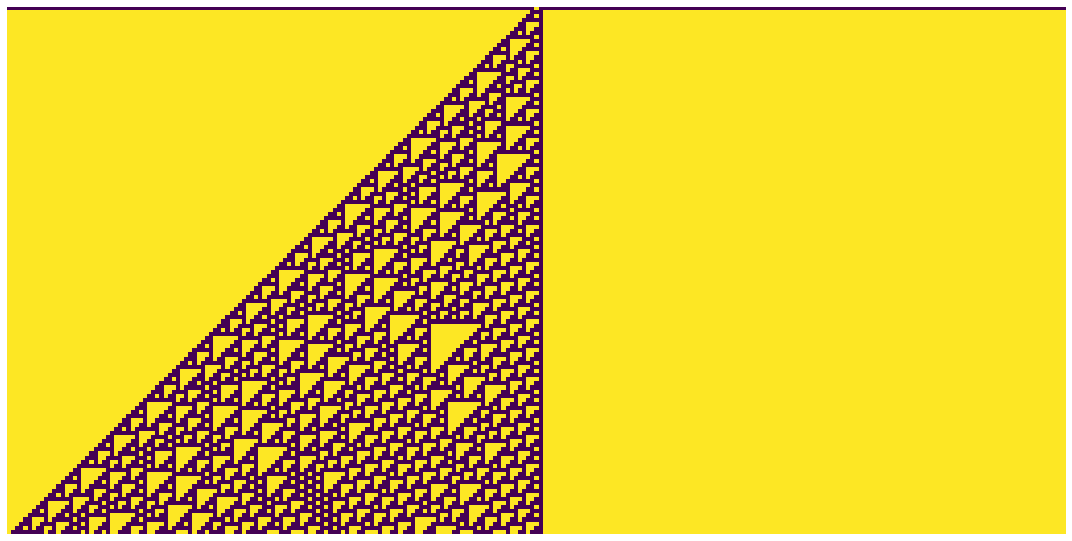

In [ ]:
import matplotlib.pyplot as plt

Rule137 = Rule({ #10001001
    (0,0,0): 1, 
    (0,0,1): 0,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 1,
})
size = 257
center = size//2

seed = State(size)
seed[size//2] = 1
ca = CellularAutomaton(seed, Rule137);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

In [ ]:
def eca(cells, rule):
    lencells = len(cells)
    c = "0" + cells + "0"    # Zero pad the ends
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {'{0:03b}'.format(n):rulebits[::-1][n] for n in range(8)}
    yield c[1:-1]
    while True:
        c = ''.join(['0',
                     ''.join(neighbours2next[c[i-1:i+2]]
                             for i in range(1,lencells+1)),
                     '0'])
        yield c[1:-1]
 
if __name__ == '__main__':
    lines, start, rules = 100, '0000000000001000000000000', (4, 90, 137)
    zipped = [range(lines)] + [eca(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = data[1:]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '@')))


   Rules: (4, 90, 137)
 0: ............@............    ............@............    ............@............
 1: ............@............    ...........@.@...........    @@@@@@@@@@@...@@@@@@@@@@@
 2: ............@............    ..........@...@..........    @@@@@@@@@@..@.@@@@@@@@@@.
 3: ............@............    .........@.@.@.@.........    @@@@@@@@@.....@@@@@@@@@..
 4: ............@............    ........@.......@........    @@@@@@@@..@@@.@@@@@@@@..@
 5: ............@............    .......@.@.....@.@.......    @@@@@@@...@@..@@@@@@@....
 6: ............@............    ......@...@...@...@......    @@@@@@..@.@...@@@@@@..@@@
 7: ............@............    .....@.@.@.@.@.@.@.@.....    @@@@@.......@.@@@@@...@@.
 8: ............@............    ....@...............@....    @@@@..@@@@@...@@@@..@.@..
 9: ............@............    ...@.@.............@.@...    @@@...@@@@..@.@@@.......@
10: ............@............    ..@...@...........@...@..    @@..@.@@@.....@@..@@@@@..
11: ....

## 2.	Half black (1) cells and half white (0) cells at randomly chosen positions

[0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


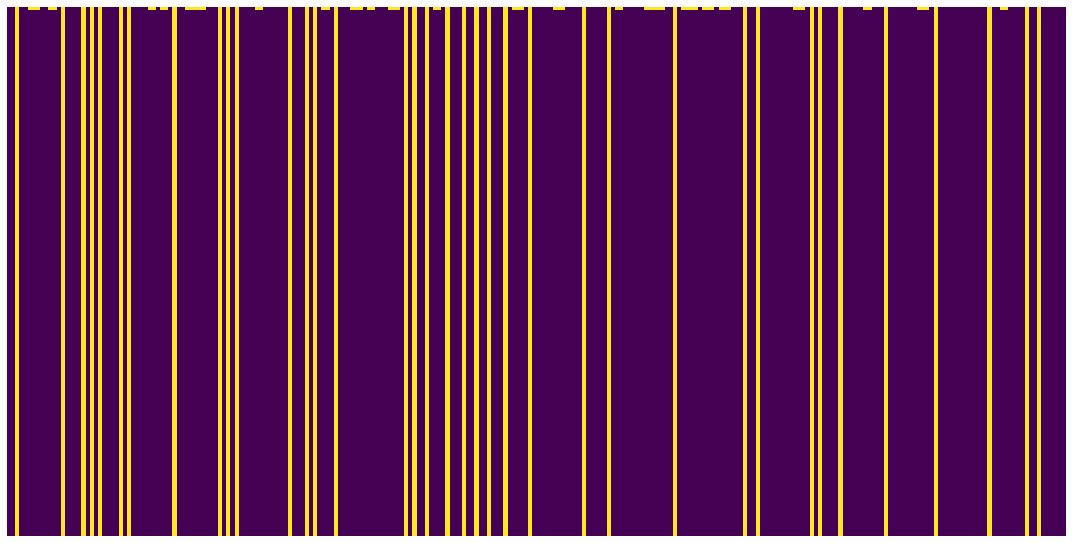

In [6]:
import matplotlib.pyplot as plt
import random
Rule4 = Rule({ #100
    (0,0,0): 0, 
    (0,0,1): 0,
    (0,1,0): 1,
    (0,1,1): 0,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 128):
  r = random.randint(1, 256)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule4);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]


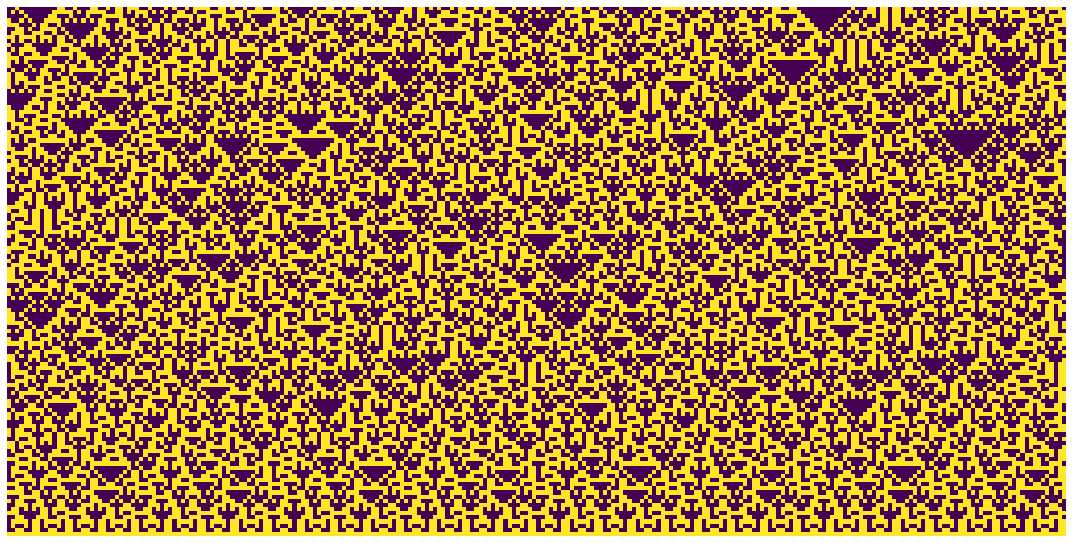

In [ ]:
import matplotlib.pyplot as plt
import random
Rule90 = Rule({ #1011010
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 1,
    (1,1,1): 0,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 128):
  r = random.randint(1, 256)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule90);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


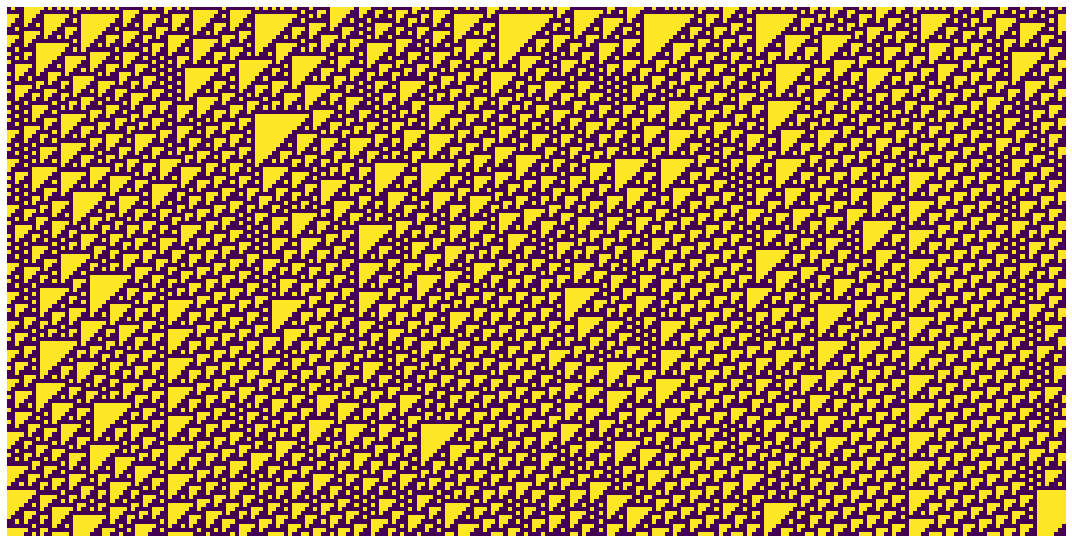

In [ ]:
import matplotlib.pyplot as plt
import random
Rule137 = Rule({ #10001001
    (0,0,0): 1, 
    (0,0,1): 0,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 1,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 128):
  r = random.randint(1, 256)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule137);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

In [ ]:
def eca(cells, rule):
    lencells = len(cells)
    c = "0" + cells + "0"    # Zero pad the ends
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {'{0:03b}'.format(n):rulebits[::-1][n] for n in range(8)}
    yield c[1:-1]
    while True:
        c = ''.join(['0',
                     ''.join(neighbours2next[c[i-1:i+2]]
                             for i in range(1,lencells+1)),
                     '0'])
        yield c[1:-1]
 
if __name__ == '__main__':
    lines, start, rules = 50, '11010011010010100100111010', (4, 90, 137)
    zipped = [range(lines)] + [eca(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = data[1:]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '@')))


   Rules: (4, 90, 137)
 0: @@.@..@@.@..@.@..@..@@@.@.    @@.@..@@.@..@.@..@..@@@.@.    @@.@..@@.@..@.@..@..@@@.@.
 1: ...@.....@..@.@..@......@.    @@..@@@@..@@...@@.@@@.@..@    @.....@.............@@....
 2: ...@.....@..@.@..@......@.    @@@@@..@@@@@@.@@@.@.@..@@.    ..@@@...@@@@@@@@@@@.@..@@@
 3: ...@.....@..@.@..@......@.    @...@@@@....@.@.@....@@@@@    @.@@..@.@@@@@@@@@@.....@@.
 4: ...@.....@..@.@..@......@.    .@.@@..@@..@.....@..@@...@    ..@.....@@@@@@@@@..@@@.@..
 5: ...@.....@..@.@..@......@.    @..@@@@@@@@.@...@.@@@@@.@.    @...@@@.@@@@@@@@...@@....@
 6: ...@.....@..@.@..@......@.    .@@@......@..@.@..@...@..@    ..@.@@..@@@@@@@..@.@..@@..
 7: ...@.....@..@.@..@......@.    @@.@@....@.@@...@@.@.@.@@.    @...@...@@@@@@........@..@
 8: ...@.....@..@.@..@......@.    @@.@@@..@..@@@.@@@.....@@@    ..@...@.@@@@@..@@@@@@.....
 9: ...@.....@..@.@..@......@.    @@.@.@@@.@@@.@.@.@@...@@.@    @...@...@@@@...@@@@@..@@@@
10: ...@.....@..@.@..@......@.    @@...@.@.@.@.....@@@.@@@..    ..

## 3.	25% of black (1) cells and 75% of white (0) cells (approximately)


[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]


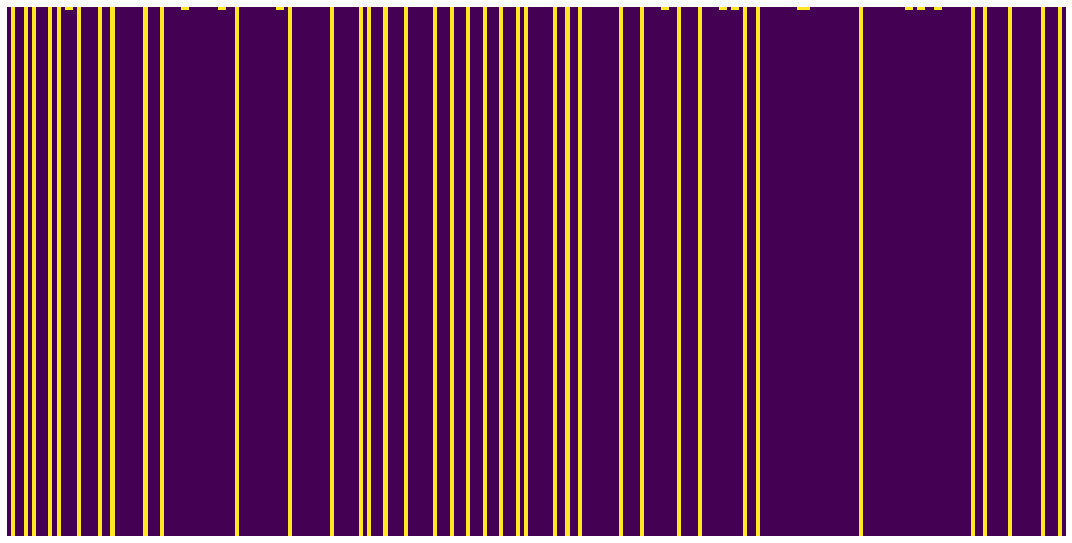

In [7]:
import matplotlib.pyplot as plt
import random
Rule4 = Rule({ #100
    (0,0,0): 0, 
    (0,0,1): 0,
    (0,1,0): 1,
    (0,1,1): 0,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 64):
  r = random.randint(1, 256)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule4);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

[0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


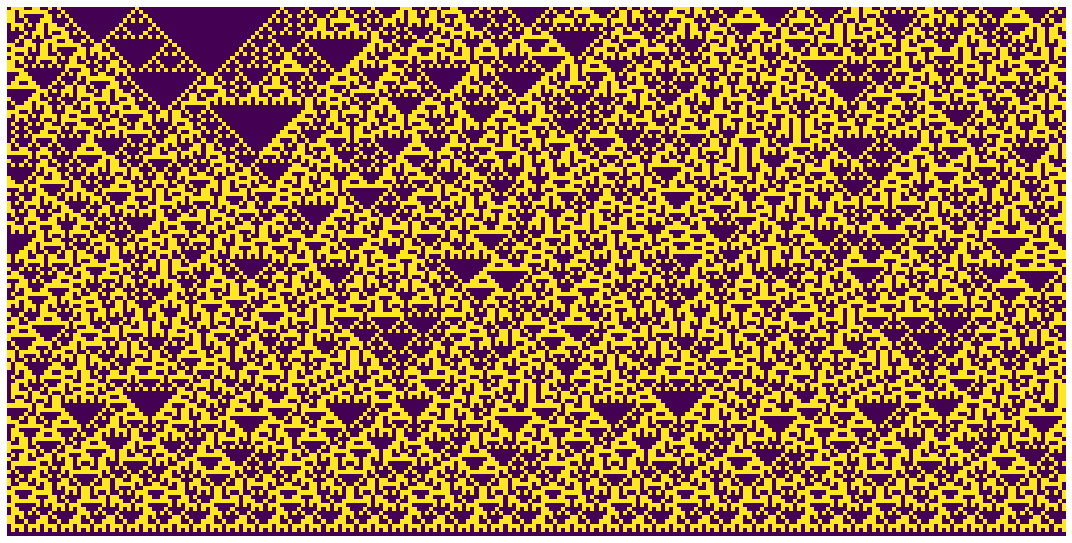

In [ ]:
import matplotlib.pyplot as plt
import random
Rule90 = Rule({ #1011010
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 1,
    (1,1,1): 0,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 64):
  r = random.randint(1, 256)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule90);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.]


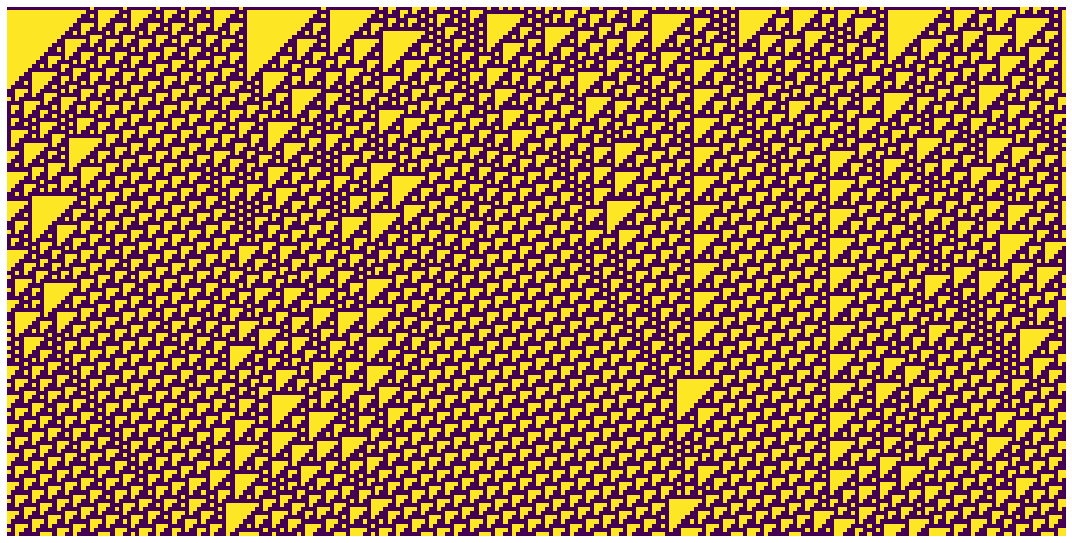

In [ ]:
import matplotlib.pyplot as plt
import random
Rule137 = Rule({ #10001001
    (0,0,0): 1, 
    (0,0,1): 0,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 1,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 64):
  r = random.randint(1, 256)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule137);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

In [ ]:
def eca(cells, rule):
    lencells = len(cells)
    c = "0" + cells + "0"    # Zero pad the ends
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {'{0:03b}'.format(n):rulebits[::-1][n] for n in range(8)}
    yield c[1:-1]
    while True:
        c = ''.join(['0',
                     ''.join(neighbours2next[c[i-1:i+2]]
                             for i in range(1,lencells+1)),
                     '0'])
        yield c[1:-1]
 
if __name__ == '__main__':
    lines, start, rules = 50, '10100100010001', (4, 90, 137)
    zipped = [range(lines)] + [eca(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = data[1:]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '@')))


   Rules: (4, 90, 137)
 0: @.@..@...@...@    @.@..@...@...@    @.@..@...@...@
 1: @.@..@...@...@    ...@@.@.@.@.@.    .......@...@..
 2: @.@..@...@...@    ..@@@........@    @@@@@@...@...@
 3: @.@..@...@...@    .@@.@@......@.    @@@@@..@...@..
 4: @.@..@...@...@    @@@.@@@....@.@    @@@@.....@...@
 5: @.@..@...@...@    @.@.@.@@..@...    @@@..@@@...@..
 6: @.@..@...@...@    ......@@@@.@..    @@...@@..@...@
 7: @.@..@...@...@    .....@@..@..@.    @..@.@.....@..
 8: @.@..@...@...@    ....@@@@@.@@.@    .......@@@...@
 9: @.@..@...@...@    ...@@...@.@@..    @@@@@@.@@..@..
10: @.@..@...@...@    ..@@@@.@..@@@.    @@@@@..@.....@
11: @.@..@...@...@    .@@..@..@@@.@@    @@@@.....@@@..
12: @.@..@...@...@    @@@@@.@@@.@.@@    @@@..@@@.@@..@
13: @.@..@...@...@    @...@.@.@...@@    @@...@@..@....
14: @.@..@...@...@    .@.@.....@.@@@    @..@.@.....@@@
15: @.@..@...@...@    @...@...@..@.@    .......@@@.@@.
16: @.@..@...@...@    .@.@.@.@.@@...    @@@@@@.@@..@..
17: @.@..@...@...@    @........@@@..    @

## 4. 90% of black (1) cells and 10% of white (0) cells (approximately)

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]


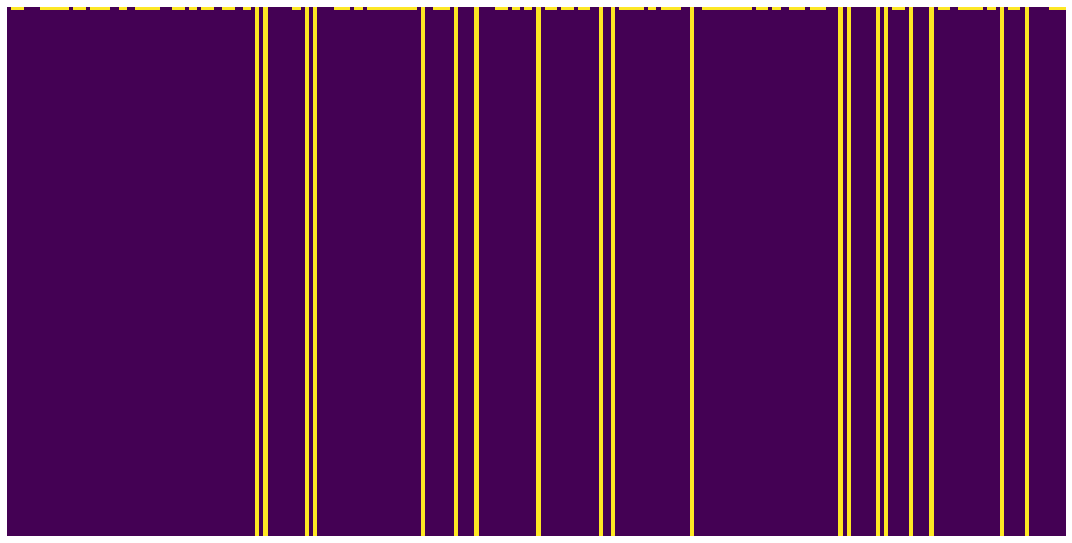

In [8]:
import matplotlib.pyplot as plt
import random
Rule4 = Rule({ #100
    (0,0,0): 0, 
    (0,0,1): 0,
    (0,1,0): 1,
    (0,1,1): 0,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 0,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 230):
  r = random.randint(1, 255)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule4);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

[0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.]


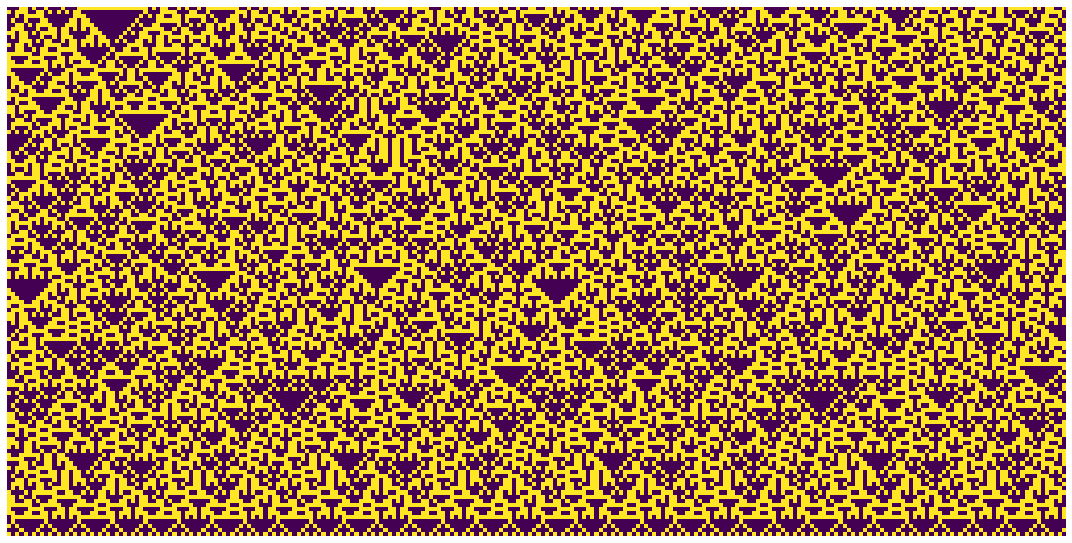

In [ ]:
import matplotlib.pyplot as plt
import random
Rule90 = Rule({ #1011010
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 1,
    (1,1,1): 0,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 230):
  r = random.randint(1, 255)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule90);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

[0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.]


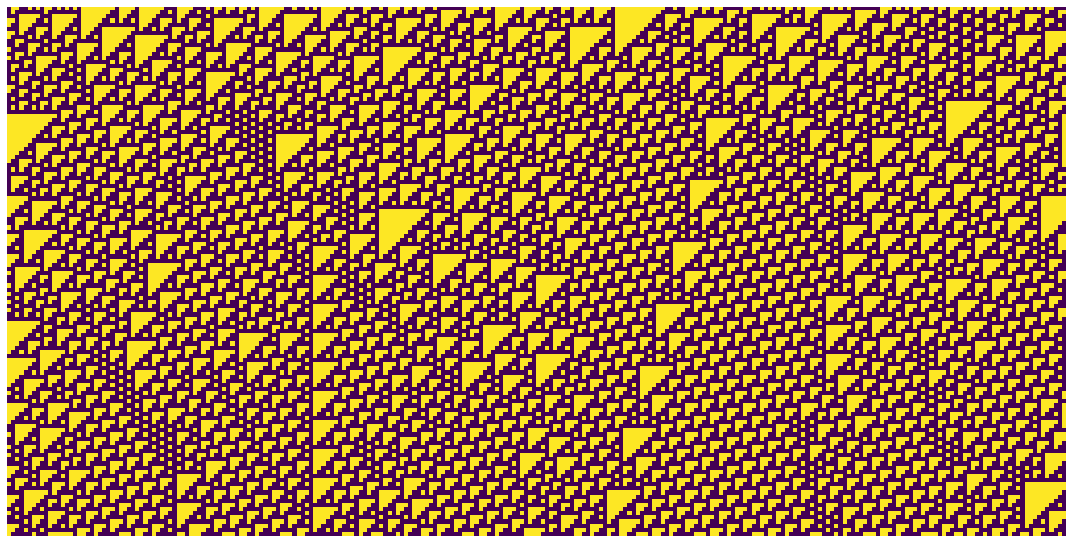

In [ ]:
import matplotlib.pyplot as plt
import random
Rule137 = Rule({ #10001001
    (0,0,0): 1, 
    (0,0,1): 0,
    (0,1,0): 0,
    (0,1,1): 1,
    (1,0,0): 0,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 1,
})
size = 256
center = size//2


seed = State(size)
for i in range(1, 230):
  r = random.randint(1, 255)
  seed[r] = 1
print(seed)
ca = CellularAutomaton(seed, Rule137);
ca.evolve(size//2)

fig = plt.figure(figsize=(15, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()

In [ ]:
def eca(cells, rule):
    lencells = len(cells)
    c = "0" + cells + "0"    # Zero pad the ends
    rulebits = '{0:08b}'.format(rule)
    neighbours2next = {'{0:03b}'.format(n):rulebits[::-1][n] for n in range(8)}
    yield c[1:-1]
    while True:
        c = ''.join(['0',
                     ''.join(neighbours2next[c[i-1:i+2]]
                             for i in range(1,lencells+1)),
                     '0'])
        yield c[1:-1]
 
if __name__ == '__main__':
    lines, start, rules = 100, '11111111011111111011', (4, 90, 137)
    zipped = [range(lines)] + [eca(start, rule) for rule in rules]
    print('\n   Rules: %r' % (rules,))
    for data in zip(*zipped):
        i = data[0]
        cells = data[1:]
        print('%2i: %s' % (i, '    '.join(cells).replace('0', '.').replace('1', '@')))


   Rules: (4, 90, 137)
 0: @@@@@@@@.@@@@@@@@.@@    @@@@@@@@.@@@@@@@@.@@    @@@@@@@@.@@@@@@@@.@@
 1: ....................    @......@.@......@.@@    @@@@@@@..@@@@@@@..@.
 2: ....................    .@....@...@....@..@@    @@@@@@...@@@@@@.....
 3: ....................    @.@..@.@.@.@..@.@@@@    @@@@@..@.@@@@@..@@@@
 4: ....................    ...@@.......@@..@..@    @@@@.....@@@@...@@@.
 5: ....................    ..@@@@.....@@@@@.@@.    @@@..@@@.@@@..@.@@..
 6: ....................    .@@..@@...@@...@.@@@    @@...@@..@@.....@..@
 7: ....................    @@@@@@@@.@@@@.@..@.@    @..@.@...@..@@@.....
 8: ....................    @......@.@..@..@@...    .......@....@@..@@@@
 9: ....................    .@....@...@@.@@@@@..    @@@@@@...@@.@...@@@.
10: ....................    @.@..@.@.@@@.@...@@.    @@@@@..@.@....@.@@..
11: ....................    ...@@....@.@..@.@@@@    @@@@.......@@...@..@
12: ....................    ..@@@@..@...@@..@..@    @@@..@@@@@.@..@.....
13: ....................   

# Exercise 4.2 – Design (invent!) your own cellular automaton

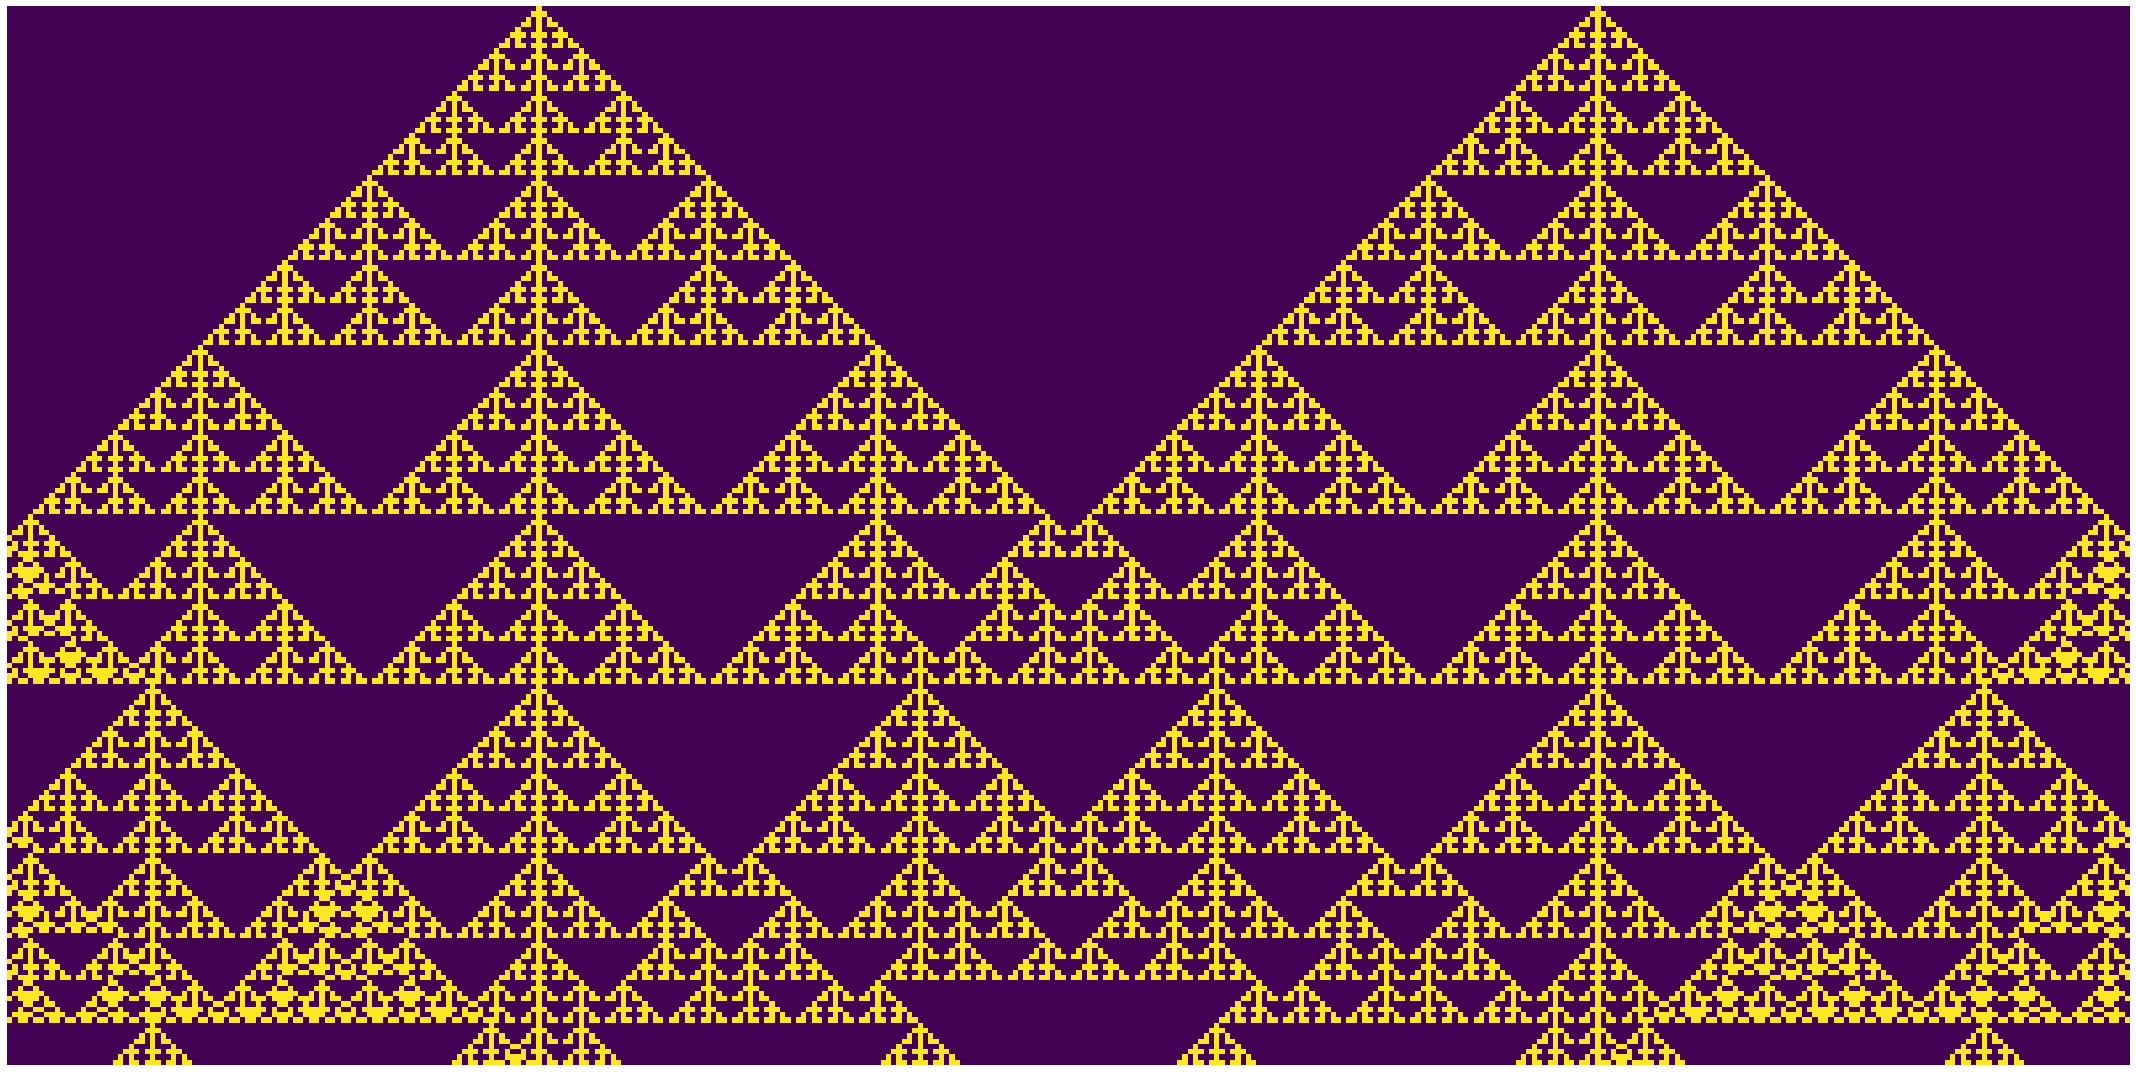

In [ ]:
import matplotlib.pyplot as plt

myRule = Rule({ #10010110
    (0,0,0): 0, 
    (0,0,1): 1,
    (0,1,0): 1,
    (0,1,1): 0,
    (1,0,0): 1,
    (1,0,1): 0,
    (1,1,0): 0,
    (1,1,1): 1,
})
size = 401
center = size//2

seed = State(size)
seed[size//4] = 1
seed[3*size//4] = 1
ca = CellularAutomaton(seed, myRule);
ca.evolve(size//2)

fig = plt.figure(figsize=(30, 15), frameon=False)
axs = fig.add_subplot('111')

axs.imshow(ca.history, cmap='viridis', interpolation='nearest')
axs.axis('off')
plt.draw()
plt.tight_layout()
plt.show()